In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('CreditCardDataset.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


# EDA + Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

* 57355 rows & 31 columns
* Target column - 'Class'
* No missing values
* Time column is numerical & discrete
* All other predictors are numerical & continous

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


Skewness of Time = -0.0314


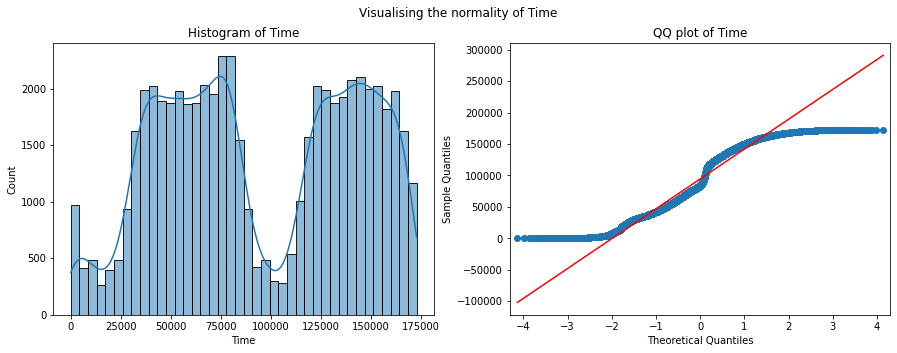

Skewness of V1 = -3.5704


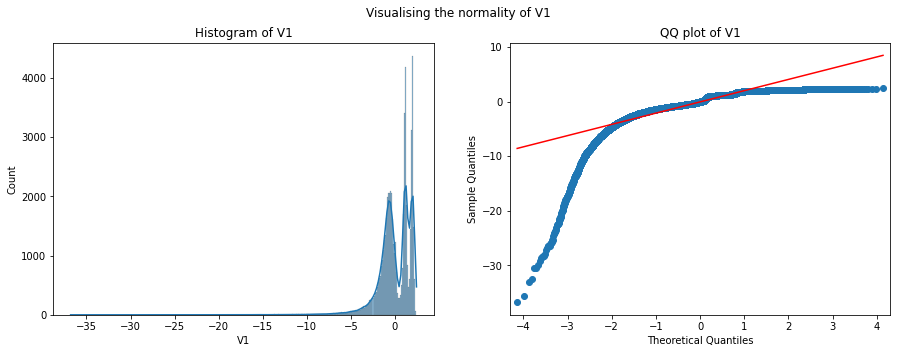

Skewness of V2 = -4.0323


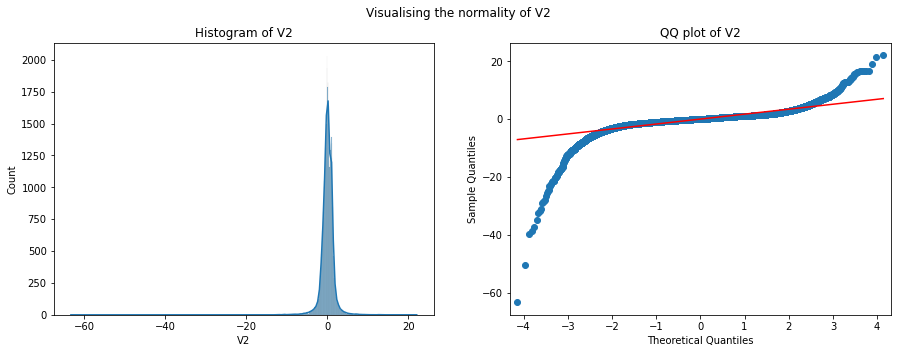

Skewness of V3 = -4.1986


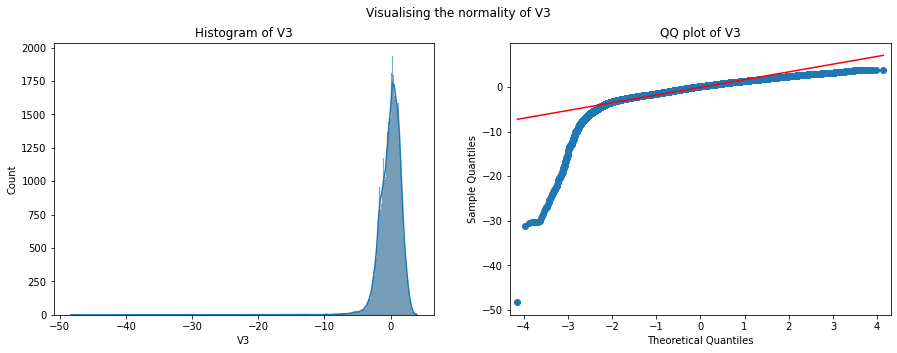

Skewness of V4 = 1.0252


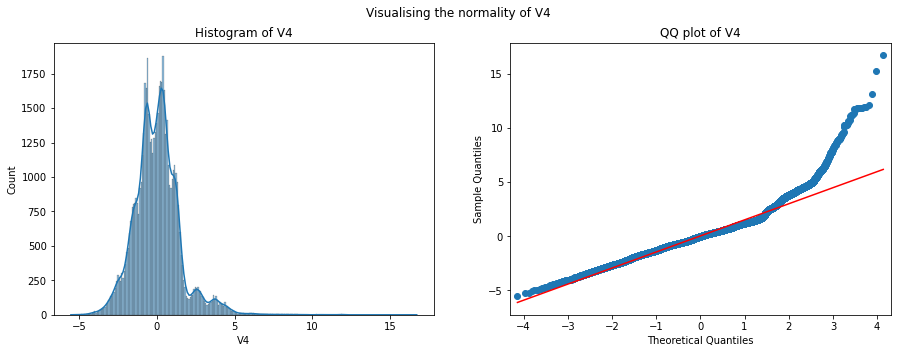

Skewness of V5 = -8.9945


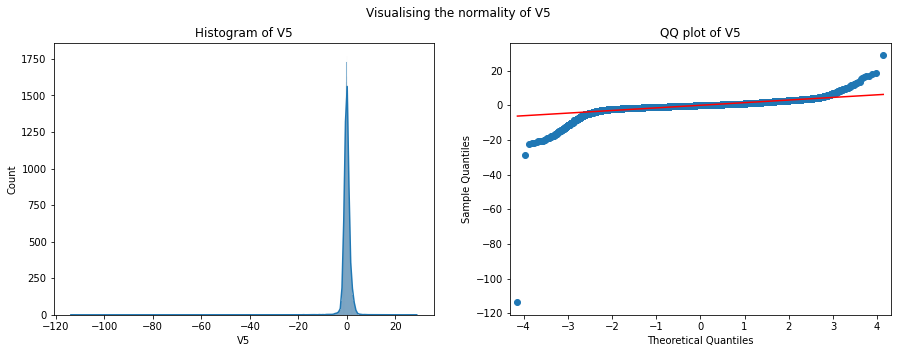

Skewness of V6 = 3.9685


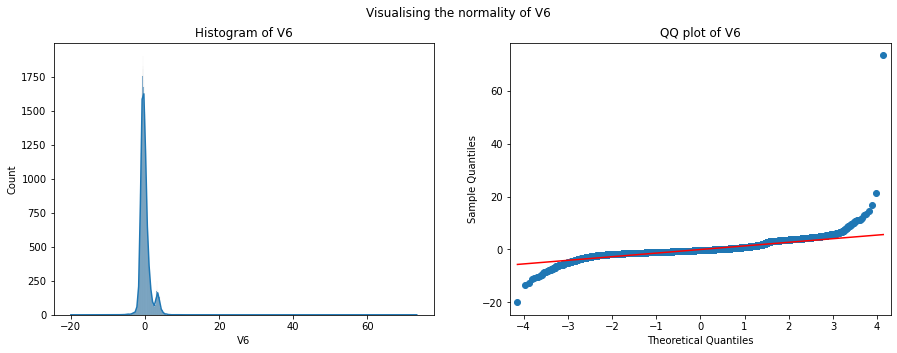

Skewness of V7 = 5.1727


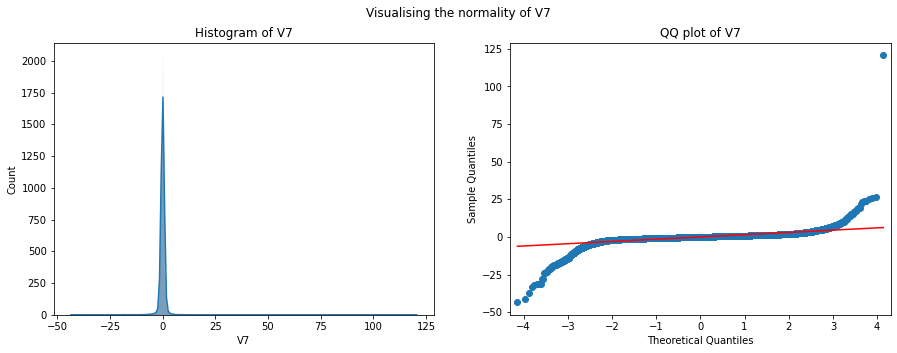

Skewness of V8 = -10.0636


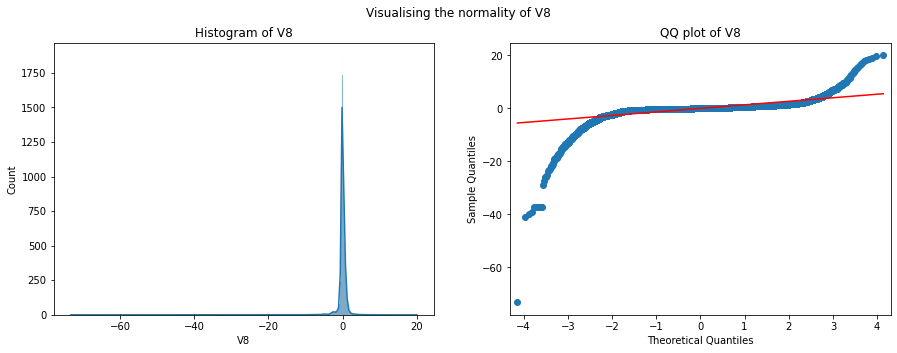

Skewness of V9 = 0.1186


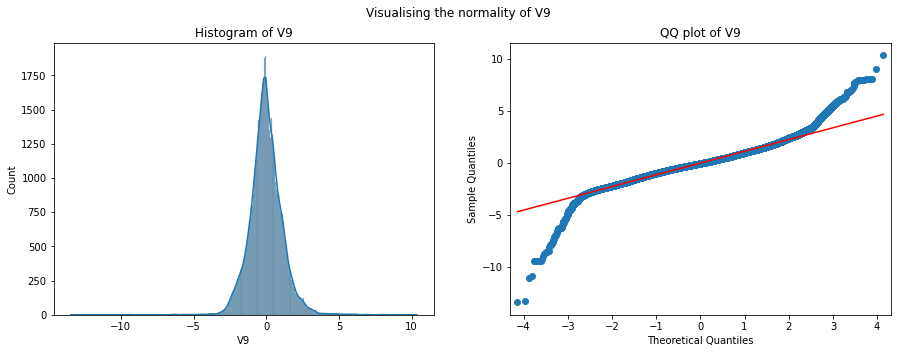

Skewness of V10 = -1.7607


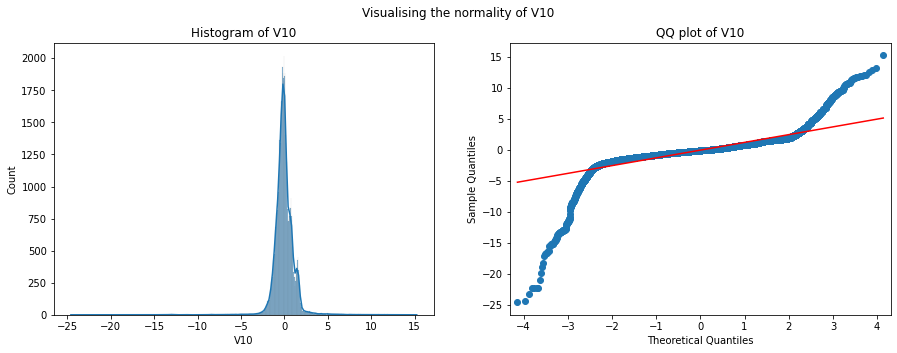

Skewness of V11 = 1.0028


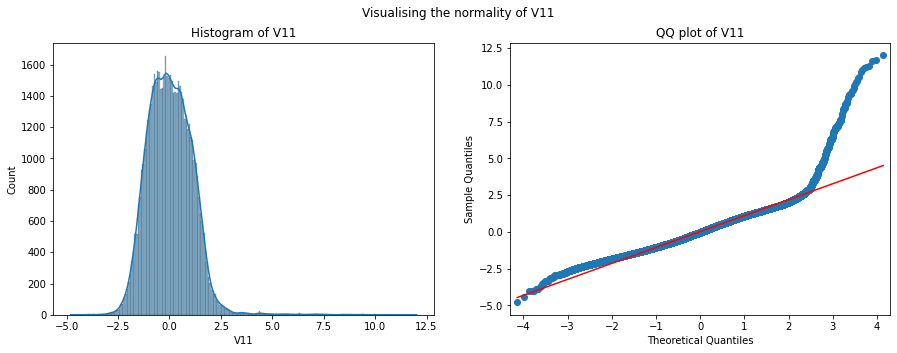

Skewness of V12 = -4.1688


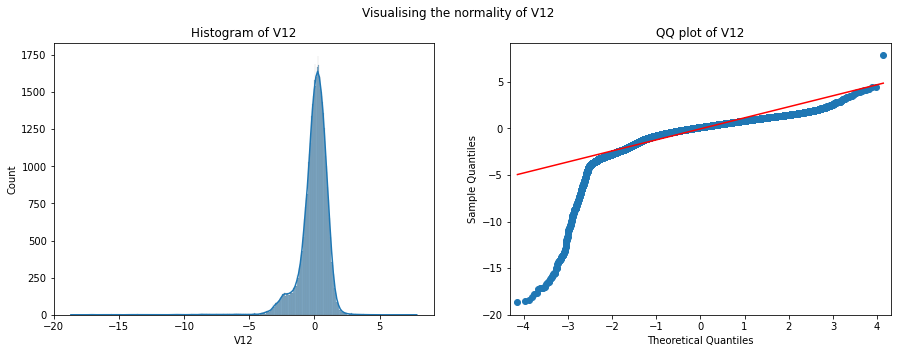

Skewness of V13 = 0.0787


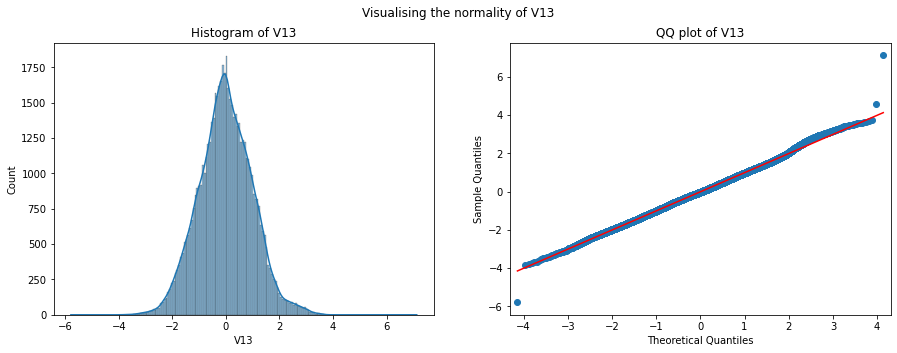

Skewness of V14 = -4.0957


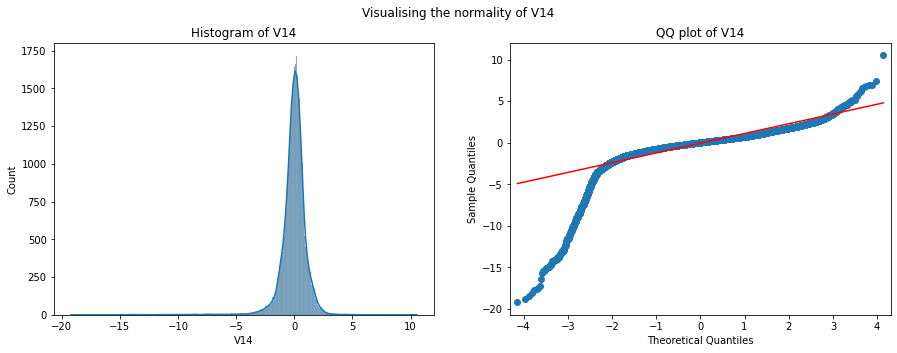

Skewness of V15 = -0.3167


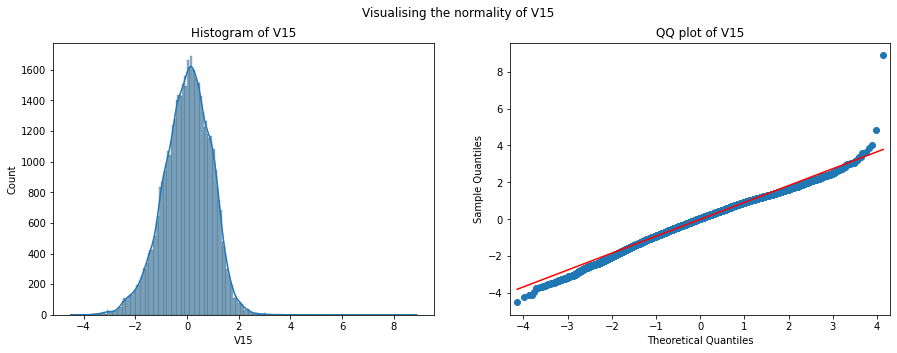

Skewness of V16 = -2.5768


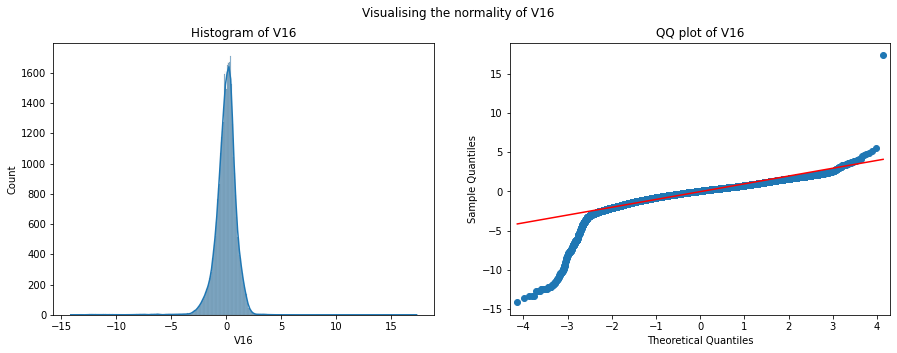

Skewness of V17 = -7.475


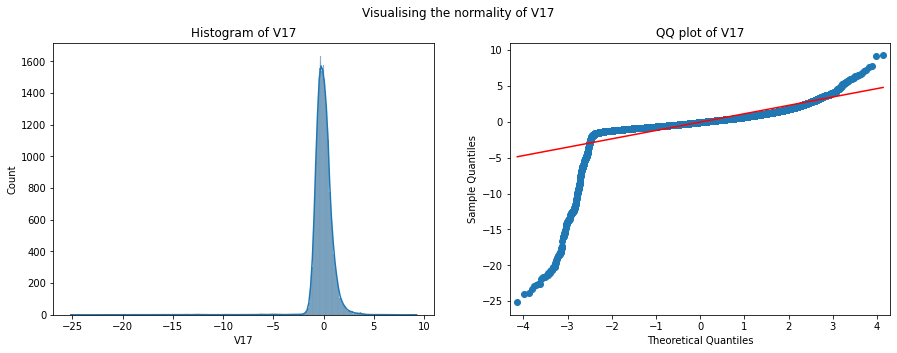

Skewness of V18 = -0.9484


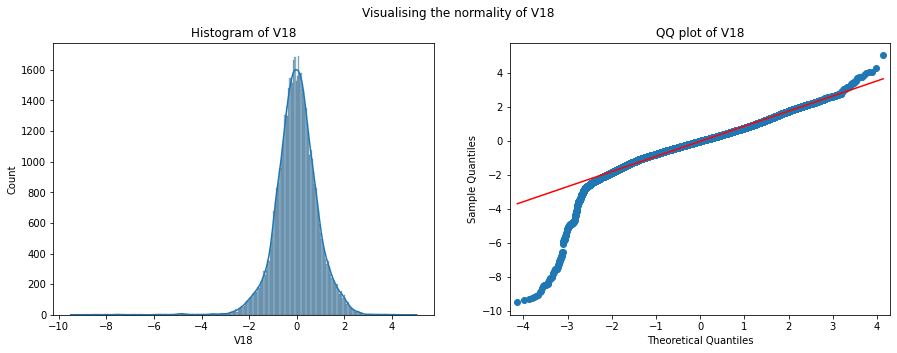

Skewness of V19 = 0.1361


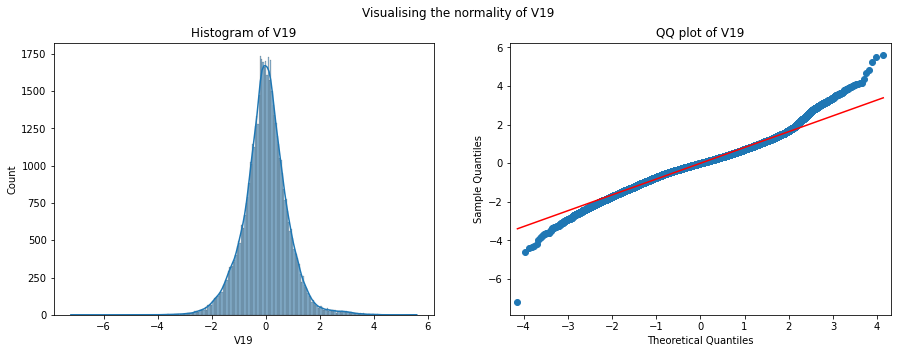

Skewness of V20 = -3.3348


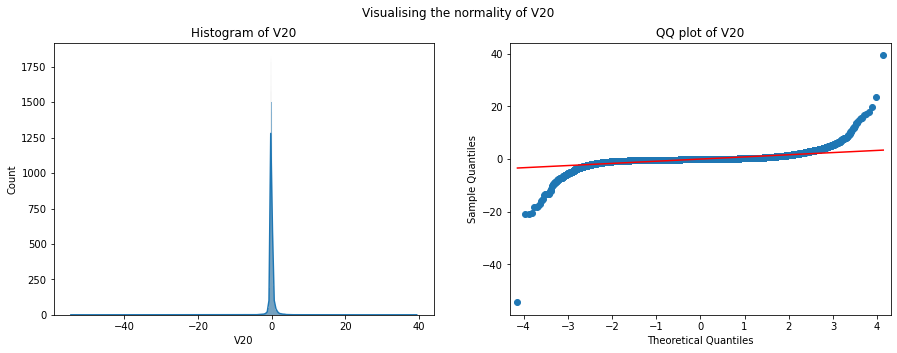

Skewness of V21 = 4.0208


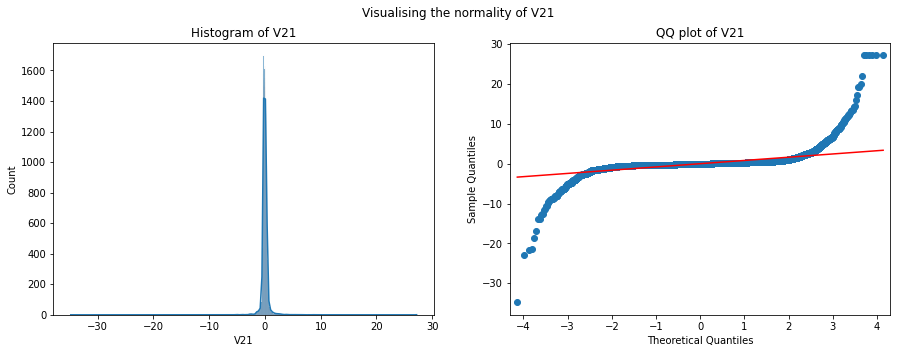

Skewness of V22 = -0.2595


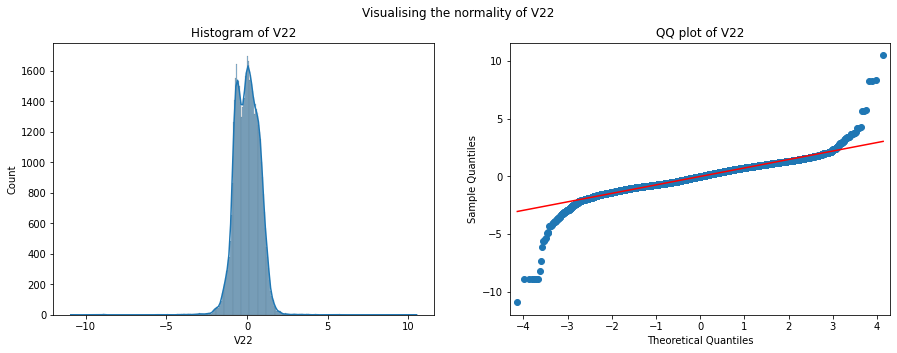

Skewness of V23 = -2.9077


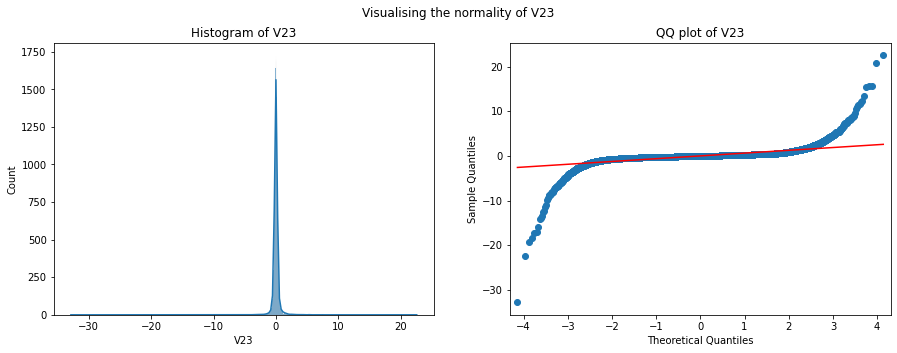

Skewness of V24 = -0.5553


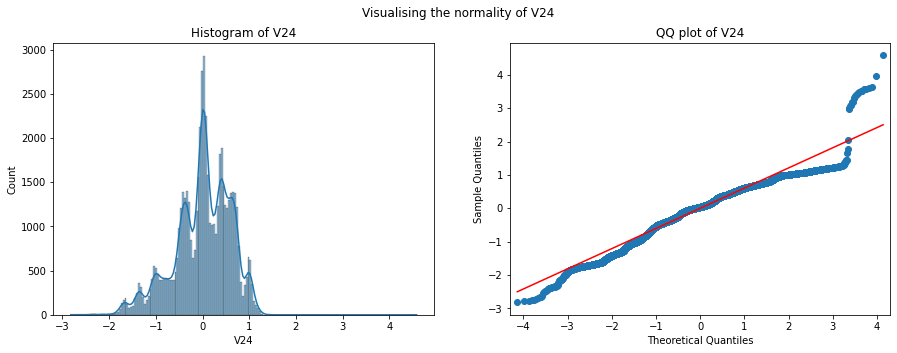

Skewness of V25 = -0.4009


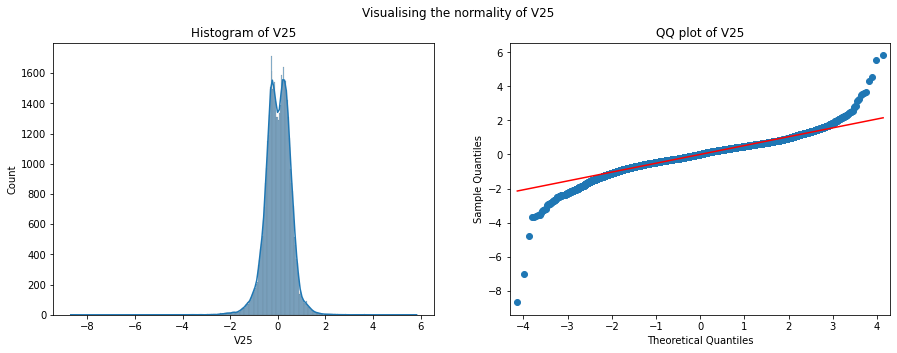

Skewness of V26 = 0.5736


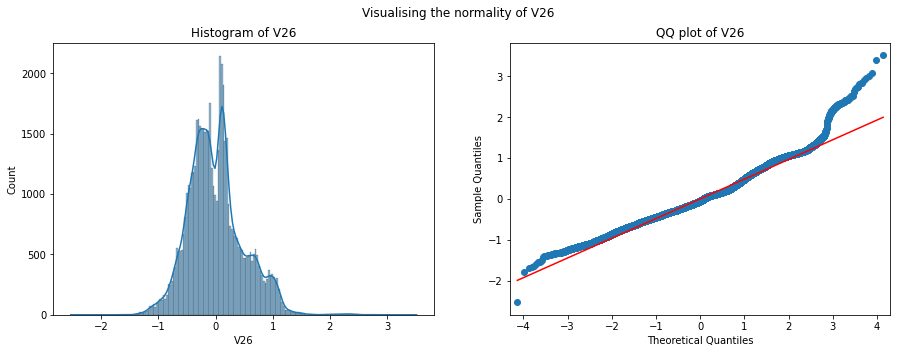

Skewness of V27 = 4.6527


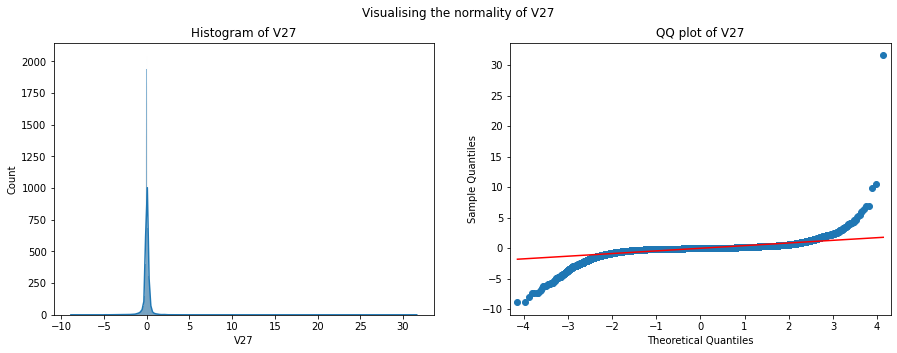

Skewness of V28 = 1.7626


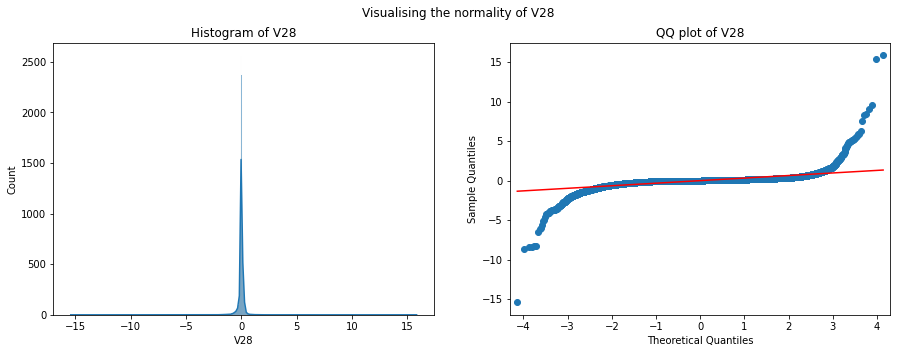

Skewness of Amount = 27.1782


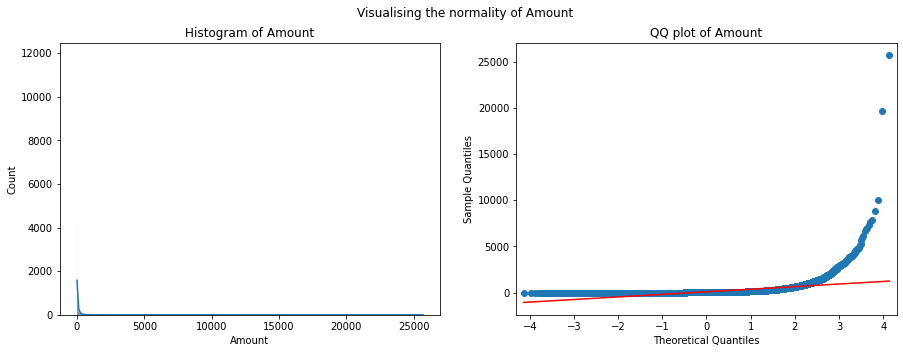

In [5]:
# Distribution of predictor columns
# Checking normality using visualisation
from statsmodels.graphics.gofplots import qqplot

for col in df.columns[:-1]:
  print(f"Skewness of {col} = {round(df[col].skew(), 4)}")

  # creating subplots
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  fig.suptitle(f'Visualising the normality of {col}')
  
  # histogram
  sns.histplot(ax=axes[0], x=df[col], kde=True)
  axes[0].set_title(f"Histogram of {col}")

  # qq-plot
  qqplot(ax=axes[1], data=df[col], line='s')
  axes[1].set_title(f"QQ plot of {col}")

  plt.show()

The predictor variables seem to be fairly normall distributed. Since we are using a neural network, such assumptions are not needed.

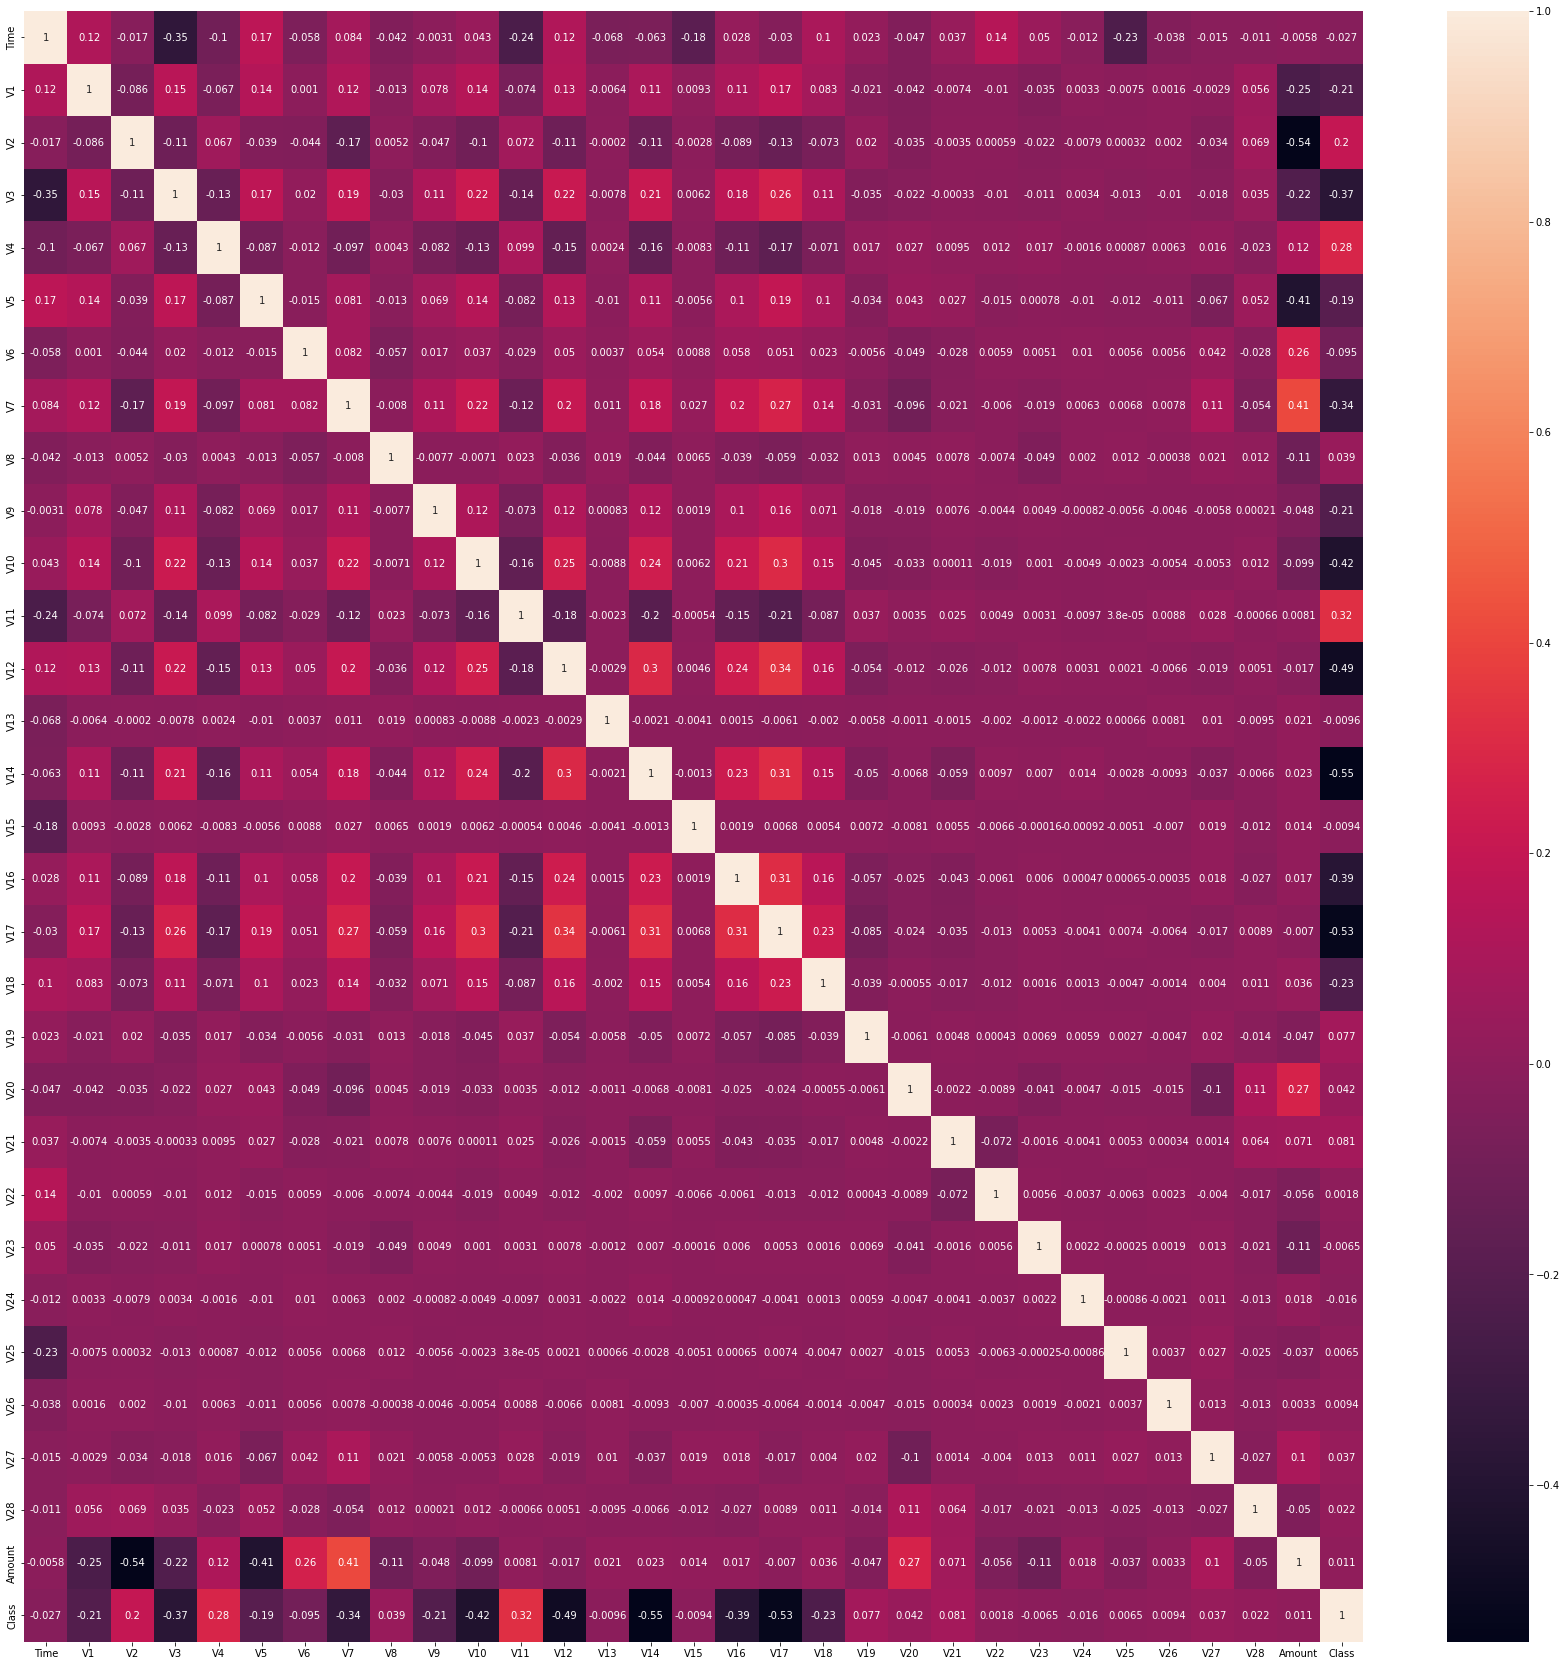

In [6]:
# correlation heatmap
plt.figure(figsize=(30, 30))
ax = sns.heatmap(df.corr(), annot=True)

Some observable correlations:
* V2 & Amount (negative)
* V5 & Amount (negative)
* V10 & Class (negative)
* V12 & Class (negative)
* V14 & Class (negative)
* V17 & Class (negative)

These all are high only relatively. Hence we continue with all the predictors. Moreover, neural networks can handle such correlations.

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
# Checking for class imbalance
y.value_counts() * 100 /len(y)

0    99.142185
1     0.857815
Name: Class, dtype: float64

The data is highly imbalanced with 0 as the dominant class (~99%). We need to perform some kind of upsampling or downsampling to handle this imbalance.


Since we are about to use neural networks, it is better to have more data. Hence we use the method of upsampling to handle the class imbalance.

SMOTE (Synthetic Minority Oversampling Technique) is a popular method to oversample data, to handle class imbalance. Here, we will use this technique.

In [9]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_, y_ = oversample.fit_resample(X, y)

In [10]:
# Checking for class imbalance after upsampling
y_.value_counts() * 100 /len(y_)

0    50.0
1    50.0
Name: Class, dtype: float64

Now the classes are well balanced.

# Neural Network using PyTorch

In [11]:
from sklearn.model_selection import train_test_split

import torch 

from torch.utils.data import Dataset
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=0.3, random_state=17)

In [13]:
class Network(nn.Module):

    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, n_classes):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.fc4 = nn.Linear(hidden3_size, n_classes)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.25)
        x = F.relu(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        return x

In [14]:
model = Network(30, 64, 32, 16, 1)
print(model)

Network(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
)


In [15]:
batch_size = 64


class TrainDataLoaderMapStyleDatasets(Dataset):
  def __init__(self):
    self.x_data = torch.from_numpy(np.array(X_train)).float()
    self.y_data = torch.from_numpy(np.array(y_train)).long()
    self.len = X_train.shape[0]

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.len

class TestDataLoaderMapStyleDatasets(Dataset):
  def __init__(self):
    self.x_data = torch.from_numpy(np.array(X_test)).float()
    self.y_data = torch.from_numpy(np.array(y_test)).long()
    self.len = X_test.shape[0]

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.len

train_ds = TrainDataLoaderMapStyleDatasets()
test_ds = TestDataLoaderMapStyleDatasets()

train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

In [16]:
# instantiate the network, loss function & optimizer

model = Network(30, 64, 32, 16, 2)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  


In [17]:
# training

epochs = 5

training_loss = []
test_loss = []
training_accuracy = []
test_accuracy = []

for epoch in range(epochs):
  
  correctly_trained = 0
  total_trained = 0

  for i, (items, classes) in enumerate(train_loader):

    
    items = Variable(items.float())
    classes = Variable(classes.long())

    model.train()
    optimizer.zero_grad()
    outputs = model(items)
    loss = loss_fn(outputs, classes)
    loss.backward()
    optimizer.step()

    total_trained += classes.size(0)
    x, pred = torch.max(outputs.data, 1)
    correctly_trained += (pred==classes.data).sum()


    print(f"Epoch: {epoch+1}; Iteration: {i+1}; Loss: {loss.item()}")
    

  model.eval()
  training_loss += [loss.item()]

  training_accuracy.append((100 * correctly_trained / total_trained))

  test_items = torch.FloatTensor(test_ds.x_data)
  test_classes = torch.LongTensor(test_ds.y_data)

  test_outputs = model(Variable(test_items))
  test_loss += [loss_fn(test_outputs, Variable(test_classes)).item()]
  

  x, test_pred = torch.max(test_outputs.data, 1)
  correctly_tested = (test_pred==test_classes.data).sum()
  test_accuracy.append((100 * correctly_tested / test_classes.size(0)))






Epoch: 1; Iteration: 1; Loss: 0.6947209239006042
Epoch: 1; Iteration: 2; Loss: 0.6943498253822327
Epoch: 1; Iteration: 3; Loss: 0.8623112440109253
Epoch: 1; Iteration: 4; Loss: 0.8132617473602295
Epoch: 1; Iteration: 5; Loss: 0.7663867473602295
Epoch: 1; Iteration: 6; Loss: 0.8132617473602295
Epoch: 1; Iteration: 7; Loss: 0.7663866877555847
Epoch: 1; Iteration: 8; Loss: 0.9070117473602295
Epoch: 1; Iteration: 9; Loss: 0.8757617473602295
Epoch: 1; Iteration: 10; Loss: 0.7663866877555847
Epoch: 1; Iteration: 11; Loss: 0.8757617473602295
Epoch: 1; Iteration: 12; Loss: 0.7507617473602295
Epoch: 1; Iteration: 13; Loss: 0.7038867473602295
Epoch: 1; Iteration: 14; Loss: 0.7976367473602295
Epoch: 1; Iteration: 15; Loss: 0.8132617473602295
Epoch: 1; Iteration: 16; Loss: 0.7663866877555847
Epoch: 1; Iteration: 17; Loss: 0.7663867473602295
Epoch: 1; Iteration: 18; Loss: 0.8132617473602295
Epoch: 1; Iteration: 19; Loss: 0.7195117473602295
Epoch: 1; Iteration: 20; Loss: 0.7663867473602295
Epoch: 1;

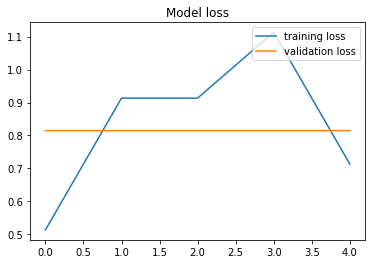

In [18]:
# plotting training loss and validation loss
plt.plot(training_loss, label='training loss')
plt.plot(test_loss, label='validation loss')
plt.title('Model loss')
plt.legend(loc='upper right')
plt.show()

In [21]:
test_loss # slight variations only

[0.8146412968635559,
 0.8146611452102661,
 0.814667284488678,
 0.8146671056747437,
 0.8146674036979675]

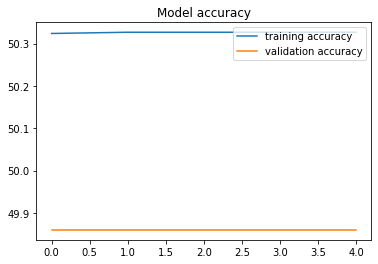

In [19]:
# plotting training accuracy and validation accuracy
plt.plot(training_accuracy, label='training accuracy')
plt.plot(test_accuracy, label='validation accuracy')
plt.title('Model accuracy')
plt.legend(loc='upper right')
plt.show()

In [22]:
training_accuracy # slight variations only

[tensor(50.3239),
 tensor(50.3268),
 tensor(50.3268),
 tensor(50.3268),
 tensor(50.3268)]

In [23]:
test_accuracy

[tensor(49.8599),
 tensor(49.8599),
 tensor(49.8599),
 tensor(49.8599),
 tensor(49.8599)]

# Conclusion

The model seems to give similar training and test accuracies. The variation in loss & accuracy across epochs is very small and hence we might:

1. Need to increase the number of epochs.
2. Try a different neural network architecture.